In [25]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib notebook

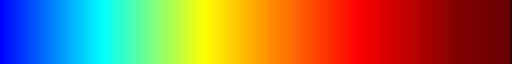

In [2]:
import matplotlib.colors as mcolors
to_rgb = mcolors.ColorConverter().to_rgb
d = {
    0.0: 'blue', 
    0.2: 'cyan', 
    0.4: 'yellow', 
    0.5: 'orange', 
    0.7: 'red', 
    0.9: (0.5, 0, 0),
    1.0: (0.4, 0, 0)
}

def create_cmap(points):
    red, green, blue = [], [], []
    for idx, color in points.items():
        r, g, b = to_rgb(color) if type(color)==str else color
        red.append([idx, r, r])
        green.append([idx, g, g])
        blue.append([idx, b, b])
    red.append([1,0.2,0])
    green.append([1,0,0])
    blue.append([1,0,0])
    
    return { 'red': red, 'green': green, 'blue': blue}

newcmp = LinearSegmentedColormap('testCmap', segmentdata=create_cmap(d), N=256)
newcmp

In [3]:
# Read dataset
dataset = Dataset('Mercator_20210315_20210318.nc')
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    easting: longitude
    northing: latitude
    history: 2021/03/29 00:09:11 MERCATOR OCEAN Netcdf creation
    source: MERCATOR PSY4QV3R1
    institution: MERCATOR OCEAN
    references: http://www.mercator-ocean.fr
    comment: CMEMS product
    Conventions: CF-1.4
    domain_name: GL12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 2021-04-07 00:00:00
    field_julian_date: 26029.0
    julian_day_unit: days since 1950-01-01 00:00:00
    forecast_range: 9-day_forecast
    forecast_type: forecast
    bulletin_date: 2021-03-29 00:00:00
    bulletin_type: operational
    FROM_ORIGINAL_FILE__longitude_min: -180.0
    FROM_ORIGINAL_FILE__longitude_max: 179.91667
    FROM_ORIGINAL_FILE__latitude_min: -80.0
    FROM_ORIGINAL_FILE__latitude_max: 90.0
    z_min: 0.494025
    z_max: 5727.917
    _C

In [4]:
# Get time data
time = np.array(dataset.variables['time'])
time

array([624156., 624180., 624204., 624228.], dtype=float32)

In [5]:
# Get depth data
depth = np.array(dataset.variables['depth'][:])
depth

array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00,
       5.078224e+00, 6.440614e+00, 7.929560e+00, 9.572997e+00,
       1.140500e+01, 1.346714e+01, 1.581007e+01, 1.849556e+01,
       2.159882e+01, 2.521141e+01, 2.944473e+01, 3.443415e+01,
       4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
       7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02,
       1.558507e+02, 1.861256e+02, 2.224752e+02, 2.660403e+02,
       3.181274e+02, 3.802130e+02, 4.539377e+02, 5.410889e+02,
       6.435668e+02, 7.633331e+02, 9.023393e+02, 1.062440e+03,
       1.245291e+03, 1.452251e+03, 1.684284e+03, 1.941893e+03,
       2.225078e+03, 2.533336e+03, 2.865703e+03, 3.220820e+03,
       3.597032e+03, 3.992484e+03, 4.405224e+03, 4.833291e+03,
       5.274784e+03, 5.727917e+03], dtype=float32)

In [6]:
# Get latitide data
latitude = np.array(dataset.variables['latitude'])
latitude

array([35.5     , 35.583332, 35.666668, 35.75    , 35.833332, 35.916668,
       36.      , 36.083332, 36.166668, 36.25    , 36.333332, 36.416668,
       36.5     , 36.583332, 36.666668, 36.75    , 36.833332, 36.916668,
       37.      , 37.083332, 37.166668, 37.25    , 37.333332, 37.416668,
       37.5     , 37.583332, 37.666668, 37.75    , 37.833332, 37.916668,
       38.      , 38.083332, 38.166668, 38.25    , 38.333332, 38.416668,
       38.5     , 38.583332, 38.666668, 38.75    , 38.833332, 38.916668,
       39.      , 39.083332, 39.166668, 39.25    , 39.333332, 39.416668,
       39.5     , 39.583332, 39.666668, 39.75    , 39.833332, 39.916668,
       40.      ], dtype=float32)

In [7]:
# Get longitude data
longitude = np.array(dataset.variables['longitude'])
longitude

array([-12.       , -11.916667 , -11.833333 , -11.75     , -11.666667 ,
       -11.583333 , -11.5      , -11.416667 , -11.333333 , -11.25     ,
       -11.166667 , -11.083333 , -11.       , -10.916667 , -10.833333 ,
       -10.75     , -10.666667 , -10.583333 , -10.5      , -10.416667 ,
       -10.333333 , -10.25     , -10.166667 , -10.083333 , -10.       ,
        -9.916667 ,  -9.833333 ,  -9.75     ,  -9.666667 ,  -9.583333 ,
        -9.5      ,  -9.416667 ,  -9.333333 ,  -9.25     ,  -9.166667 ,
        -9.083333 ,  -9.       ,  -8.916667 ,  -8.833333 ,  -8.75     ,
        -8.666667 ,  -8.583333 ,  -8.5      ,  -8.416667 ,  -8.333333 ,
        -8.25     ,  -8.166667 ,  -8.083333 ,  -8.       ,  -7.9166665,
        -7.8333335,  -7.75     ,  -7.6666665,  -7.5833335,  -7.5      ,
        -7.4166665,  -7.3333335,  -7.25     ,  -7.1666665,  -7.0833335,
        -7.       ,  -6.9166665,  -6.8333335,  -6.75     ,  -6.6666665,
        -6.5833335,  -6.5      ,  -6.4166665,  -6.3333335,  -6.2

## Temperatura

In [8]:
# Get temperature data from specific time and depth
temp_data = dataset.variables['thetao'][:]
temp = temp_data[0][0]
temp

masked_array(
  data=[[16.52916043996811, 16.53794977068901, 16.56651509553194, ...,
         --, 16.576769314706326, 16.502060003578663],
        [16.674916841089725, 16.715933717787266, 16.76281014829874, ...,
         16.56212043017149, 16.49253822863102, 16.428815580904484],
        [16.888058111071587, 16.908566549420357, 16.9268776550889, ...,
         16.497665338218212, 16.456648461520672, 16.40684225410223],
        ...,
        [15.730796232819557, 15.586504720151424, 15.446607872843742, ...,
         --, --, --],
        [15.774742886424065, 15.594561606645584, 15.41291543841362, ...,
         --, --, --],
        [15.76082644611597, 15.537430956959724, 15.312570579349995, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  Tr

<AxesSubplot:title={'center':'Temperature'}>

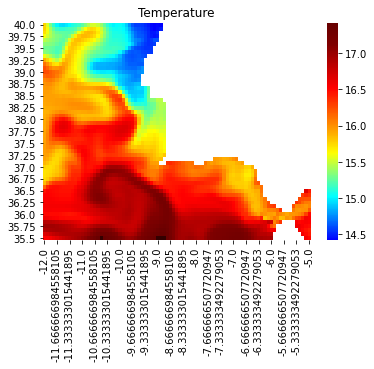

In [12]:
# Temperatura
df = pd.DataFrame(temp, index=latitude, columns=longitude)
df = df.sort_index(ascending=False)

txt = 'var temperature = ['
for row, row_data in df.iterrows():
    for col, data in row_data.iteritems():
        if (not pd.isnull(data)):
            txt += '[%f, %f, %f],\n' % (row, col, data)
txt += ']'

with open('temperature.js', 'w') as f:
    f.write(txt)

plt.title('Temperature')
sns.heatmap(df, cmap=newcmp)

## Salinidade

In [10]:
# Get temperature data from specific time and depth
sal_data = dataset.variables['so'][:]
sal = sal_data[0][0]
sal

masked_array(
  data=[[36.33228549733758, 36.33381142280996, 36.338389199227095, ...,
         --, 36.27277440391481, 36.336863273754716],
        [36.35517437942326, 36.362804006785154, 36.373485485091805, ...,
         36.31702624261379, 36.33991512469947, 36.4528336096555],
        [36.397900292649865, 36.40552992001176, 36.41315954737365, ...,
         36.312448466196656, 36.420789174735546, 36.55812246724963],
        ...,
        [36.107974452897906, 36.07135224156082, 36.037781881168485, ...,
         --, --, --],
        [36.11865593120456, 36.074404092505574, 36.03167817927897, ...,
         --, --, --],
        [36.1156040802598, 36.062196688726544, 36.011841148138046, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  

<AxesSubplot:title={'center':'Salinity'}>

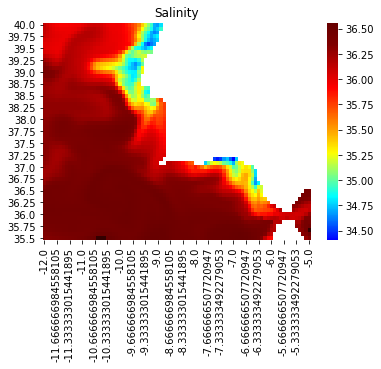

In [13]:
# Salinidade
df = pd.DataFrame(sal, index=latitude, columns=longitude)
df = df.sort_index(ascending=False)

txt = 'var salinity = ['
for row, row_data in df.iterrows():
    for col, data in row_data.iteritems():
        if (not pd.isnull(data)):
            txt += '[%f, %f, %f],\n' % (row, col, data)
txt += ']'

with open('salinity.js', 'w') as f:
    f.write(txt)

plt.title('Salinity')
sns.heatmap(df, cmap=newcmp)

## Wind

In [15]:
# Get u
u_data = dataset.variables['uo'][:]
u = u_data[0][0]
u

masked_array(
  data=[[-0.07019257172942162, -0.07080294191837311,
         -0.06775109097361565, ..., --, 0.04577776417136192,
         0.19592883065342903],
        [-0.1269569993019104, -0.11719107627868652, -0.10376293212175369,
         ..., 0.04699850454926491, 0.14587847515940666,
         0.16357921063899994],
        [-0.10193182155489922, -0.08117923513054848,
         -0.059205908328294754, ..., 0.07751701399683952,
         0.051881466060876846, -0.13245033100247383],
        ...,
        [-0.035401470959186554, -0.022583696991205215,
         -0.009155552834272385, ..., --, --, --],
        [-0.01342814415693283, -0.0030518509447574615,
         0.007324442267417908, ..., --, --, --],
        [0.009155552834272385, 0.01831110566854477, 0.02624591812491417,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        

In [53]:
# U
dfu = pd.DataFrame(u, index=latitude, columns=longitude)
dfu = dfu.sort_index(ascending=False)
# dfu = dfv.fillna(-99)
dfu

-12.000000  -11.916667  -11.833333  -11.750000  -11.666667  \
40.000000    0.009156    0.018311    0.026246    0.030519    0.035401   
39.916668   -0.013428   -0.003052    0.007324    0.017090    0.026246   
39.833332   -0.035401   -0.022584   -0.009156    0.003662    0.014039   
39.750000   -0.050661   -0.035401   -0.021363   -0.009156   -0.001831   
39.666668   -0.053102   -0.039064   -0.026856   -0.018921   -0.015259   
39.583332   -0.045778   -0.036012   -0.027467   -0.021973   -0.018921   
39.500000   -0.017090   -0.014649   -0.012207   -0.009766   -0.006714   
39.416668    0.028687    0.025025    0.020142    0.016480    0.015259   
39.333332    0.042726    0.043336    0.039674    0.034181    0.029298   
39.250000    0.019532    0.026856    0.029908    0.028687    0.025636   
39.166668   -0.019532   -0.011597   -0.003662    0.001221    0.004273   
39.083332   -0.037843   -0.036622   -0.032960   -0.025636   -0.019532   
39.000000   -0.029298   -0.031129   -0.032960   -0.032350   -0.032350   
38.916668   -0.023194   -0.024415   -0.029298   -0.037233   -0.047609   
38.833332   -0.041505   -0.043336   -0.051271   -0.064699   -0.079348   
38.750000   -0.073244   -0.077517   -0.086062   -0.098270   -0.108646   
38.666668   -0.099490   -0.103763   -0.107425   -0.112308   -0.114139   
38.583332   -0.107425   -0.112308   -0.111087   -0.105594   -0.097049   
38.500000   -0.093387   -0.099490   -0.097659   -0.088504   -0.075076   
38.416668   -0.086062   -0.086673   -0.083010   -0.073855   -0.060427   
38.333332   -0.100101   -0.095218   -0.088504   -0.078738   -0.065920   
38.250000   -0.131230   -0.128788   -0.123295   -0.113529   -0.100101   
38.166668   -0.157476   -0.156865   -0.149541   -0.134892   -0.114750   
38.083332   -0.161138   -0.158086   -0.145268   -0.122074   -0.093997   
38.000000   -0.138554   -0.136723   -0.122684   -0.098880   -0.073244   
37.916668   -0.103153   -0.104373   -0.098880   -0.086062   -0.075076   
37.833332   -0.081790   -0.086673   -0.092166   -0.094607   -0.103153   
37.750000   -0.075686   -0.085452   -0.099490   -0.114139   -0.135502   
37.666668   -0.072634   -0.088504   -0.108646   -0.130009   -0.154424   
37.583332   -0.068972   -0.089114   -0.109867   -0.129398   -0.150151   
37.500000   -0.066530   -0.086673   -0.104373   -0.119022   -0.132450   
37.416668   -0.066530   -0.083621   -0.097049   -0.105594   -0.112918   
37.333332   -0.071413   -0.081790   -0.088504   -0.090335   -0.091556   
37.250000   -0.079958   -0.083010   -0.081179   -0.075686   -0.073855   
37.166668   -0.090335   -0.084231   -0.073855   -0.064699   -0.061647   
37.083332   -0.091556   -0.078127   -0.063478   -0.054933   -0.054933   
37.000000   -0.078738   -0.065310   -0.053713   -0.049440   -0.051271   
36.916668   -0.076296   -0.064699   -0.054933   -0.048219   -0.042726   
36.833332   -0.085452   -0.069582   -0.051271   -0.032960   -0.015870   
36.750000   -0.078738   -0.053102   -0.024415    0.001221    0.019532   
36.666668   -0.047609   -0.018311    0.006104    0.021973    0.026856   
36.583332   -0.023804   -0.009766   -0.004883   -0.011597   -0.023804   
36.500000   -0.032350   -0.037233   -0.051881   -0.068361   -0.085452   
36.416668   -0.064089   -0.079958   -0.095218   -0.107425   -0.119633   
36.333332   -0.107425   -0.120243   -0.125736   -0.128788   -0.131230   
36.250000   -0.131840   -0.138554   -0.141606   -0.140385   -0.134892   
36.166668   -0.125126   -0.130619   -0.137333   -0.140385   -0.139164   
36.083332   -0.097049   -0.099490   -0.103763   -0.109256   -0.112918   
36.000000   -0.018921   -0.023194   -0.026856   -0.030519   -0.032960   
35.916668    0.088504    0.093997    0.097659    0.099490    0.100101   
35.833332    0.105594    0.125736    0.144047    0.159917    0.172124   
35.750000    0.006104    0.029298    0.053102    0.076296    0.097049   
35.666668   -0.101932   -0.081179   -0.059206   -0.036622   -0.014649   
35.583332   -0.126957   -0.117191   -0.103763   -0.089114   -0.072634

In [17]:
# Get v
v_data = dataset.variables['vo'][:]
v = v_data[0][0]
v

masked_array(
  data=[[0.024414807558059692, 0.02624591812491417, 0.0238044373691082,
         ..., --, -0.10864589363336563, -0.2215643785893917],
        [0.017700735479593277, 0.019531846046447754,
         0.017700735479593277, ..., -0.08667256683111191,
         -0.19287697970867157, -0.21729178726673126],
        [0.0006103701889514923, 0.0006103701889514923,
         -0.0024414807558059692, ..., -0.20752586424350739,
         -0.1898251287639141, -0.06897183135151863],
        ...,
        [-0.11352885514497757, -0.10925626382231712,
         -0.09460737928748131, ..., --, --, --],
        [-0.12329477816820145, -0.12329477816820145, -0.1110873743891716,
         ..., --, --, --],
        [-0.13000885024666786, -0.13245033100247383,
         -0.12268440797924995, ..., --, --, --]],
  mask=[[False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, 

In [52]:
# V
dfv = pd.DataFrame(v, index=latitude, columns=longitude)
dfv = dfv.sort_index(ascending=False)
# dfv = dfv.fillna(-99)
dfv

-12.000000  -11.916667  -11.833333  -11.750000  -11.666667  \
40.000000   -0.130009   -0.132450   -0.122684   -0.101321   -0.074465   
39.916668   -0.123295   -0.123295   -0.111087   -0.089114   -0.062258   
39.833332   -0.113529   -0.109256   -0.094607   -0.073244   -0.048219   
39.750000   -0.100711   -0.093997   -0.078738   -0.059206   -0.039064   
39.666668   -0.082400   -0.075076   -0.063478   -0.050050   -0.037843   
39.583332   -0.067751   -0.062258   -0.054933   -0.048830   -0.041505   
39.500000   -0.065920   -0.059206   -0.053713   -0.048830   -0.039674   
39.416668   -0.067751   -0.061037   -0.056154   -0.051271   -0.039674   
39.333332   -0.070193   -0.067751   -0.064699   -0.058596   -0.045167   
39.250000   -0.064089   -0.067751   -0.069582   -0.066530   -0.056154   
39.166668   -0.052492   -0.059206   -0.065920   -0.070803   -0.065920   
39.083332   -0.044557   -0.053102   -0.064089   -0.072024   -0.065920   
39.000000   -0.036622   -0.045778   -0.057375   -0.061647   -0.056154   
38.916668   -0.029908   -0.042116   -0.051881   -0.055544   -0.060427   
38.833332   -0.028687   -0.044557   -0.057375   -0.067751   -0.082400   
38.750000   -0.032960   -0.053713   -0.073855   -0.092166   -0.108036   
38.666668   -0.042726   -0.064699   -0.088504   -0.107425   -0.117191   
38.583332   -0.054323   -0.072634   -0.092166   -0.106815   -0.110477   
38.500000   -0.064699   -0.077517   -0.090945   -0.100711   -0.101932   
38.416668   -0.068361   -0.075076   -0.082400   -0.087283   -0.087283   
38.333332   -0.064089   -0.066530   -0.067751   -0.067141   -0.064699   
38.250000   -0.058596   -0.058596   -0.057375   -0.053102   -0.046999   
38.166668   -0.061037   -0.056764   -0.046999   -0.032960   -0.021973   
38.083332   -0.067751   -0.050661   -0.024415    0.001831    0.015259   
38.000000   -0.075686   -0.044557   -0.000610    0.036622    0.044557   
37.916668   -0.079958   -0.039064    0.021363    0.062868    0.062868   
37.833332   -0.081179   -0.034181    0.034791    0.068361    0.059206   
37.750000   -0.080569   -0.036622    0.023804    0.043947    0.032960   
37.666668   -0.084231   -0.048219   -0.003052    0.008545    0.001831   
37.583332   -0.094607   -0.065310   -0.032960   -0.023194   -0.021973   
37.500000   -0.111698   -0.089724   -0.066530   -0.055544   -0.042116   
37.416668   -0.129398   -0.112918   -0.095218   -0.079348   -0.054323   
37.333332   -0.140385   -0.128788   -0.112918   -0.091556   -0.057375   
37.250000   -0.145878   -0.138554   -0.122684   -0.093997   -0.054933   
37.166668   -0.149541   -0.142216   -0.121464   -0.086673   -0.049440   
37.083332   -0.144047   -0.130009   -0.104984   -0.074465   -0.051271   
37.000000   -0.126347   -0.110477   -0.090335   -0.072024   -0.060427   
36.916668   -0.111698   -0.099490   -0.086062   -0.074465   -0.064699   
36.833332   -0.101321   -0.089114   -0.074465   -0.061647   -0.051271   
36.750000   -0.078738   -0.058596   -0.039064   -0.027467   -0.025025   
36.666668   -0.045167   -0.017090   -0.000610   -0.002441   -0.017090   
36.583332   -0.009766    0.012207    0.010987   -0.009156   -0.036012   
36.500000    0.008545    0.007324   -0.010376   -0.034181   -0.059206   
36.416668   -0.009766   -0.018921   -0.032960   -0.053102   -0.073855   
36.333332   -0.034181   -0.035401   -0.043947   -0.059206   -0.076296   
36.250000   -0.048219   -0.045167   -0.048219   -0.056764   -0.067751   
36.166668   -0.056764   -0.053713   -0.053713   -0.056764   -0.063478   
36.083332   -0.062868   -0.060427   -0.059206   -0.059816   -0.062868   
36.000000   -0.062258   -0.062868   -0.064089   -0.065310   -0.065310   
35.916668   -0.056154   -0.054323   -0.054323   -0.055544   -0.055544   
35.833332   -0.028077   -0.029908   -0.032960   -0.035401   -0.037233   
35.750000   -0.017090   -0.020142   -0.025025   -0.030519   -0.036012   
35.666668    0.000610    0.000610   -0.002441   -0.008545   -0.016480   
35.583332    0.017701    0.019532    0.017701    0.012818    0.006104

<IPython.core.display.Javascript object>


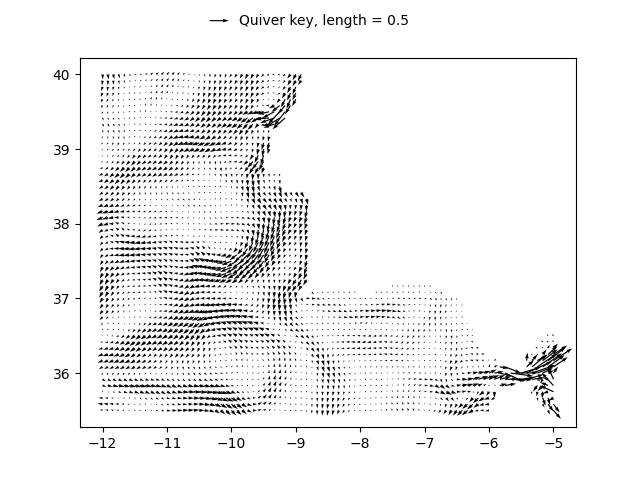

In [81]:
x = df.columns.values
y = df.index.values

fig, ax = plt.subplots()
q = ax.quiver(x, y, dfu.values, dfv.values)
ax.quiverkey(q, X=0.3, Y=1.1, U=0.5,
             label='Quiver key, length = 0.5', labelpos='E')

In [83]:
import json
# Criar arquivo de saida
nx = len(x)
ny = len(y)
dx = float(np.diff(longitude).mean())
dy = float(np.diff(latitude).mean())
tot = nx*ny
la1,la2 = float(max(latitude)), float(min(latitude))
lo1,lo2 = float(min(longitude)), float(max(longitude))
udata = np.nan_to_num(dfu.values.flatten()*10)
vdata = np.nan_to_num(dfv.values.flatten()*10)

wind_data = [{
  "header": {
    "parameterNumberName": "eastward_wind",
    "parameterUnit": "m.s-1",
    "parameterNumber": 2,
    "parameterCategory": 2,
    "nx": nx,
    "ny": ny,
    "numberPoints": tot,
    "dx": dx,
    "dy": dy,
    "la1": la1,
    "lo1": lo1,
    "la2": la2,
    "lo2": lo2,
#     "refTime": "2017-02-01 23:00:00"
  },
  "data": list(udata)
}, {
  "header": {
    "parameterNumberName": "northward_wind",
    "parameterUnit": "m.s-1",
    "parameterNumber": 3,
    "parameterCategory": 2,
    "nx": nx,
    "ny": ny,
    "numberPoints": tot,
    "dx": dx,
    "dy": dy,
    "la1": la1,
    "lo1": lo1,
    "la2": la2,
    "lo2": lo2,
#     "refTime": "2017-02-01 23:00:00"
  },
  "data": list(vdata)
}]

with open('wind.json', 'w') as outfile:
    json.dump(wind_data, outfile, separators=(',', ':'), indent=4)